<a href="https://colab.research.google.com/github/mqquiroz/ICH3424/blob/master/Battjes_Janssen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ayudantía 10 - ICH3424 Ingeniería de Costas
## Hidrodinámica en la Zona de Rompientes
### Aplicación del Modelo de Battjes y Janssen (1978)

#### Conservación de la energía para calcular la evolución de la altura de ola:

$$\underbrace{\frac{\left(E C_{g}\right)_{2}-\left(E C_{g}\right)_{1}}{\Delta x}}_{\frac{dE C_{g}}{dx}}= -\overline{D}_{b}= -\frac{\rho g}{4} f \frac{H^{3}}{h}\quad \text{Battjes and Janssen (1978)}$$

#### Conservación de la cantidad de movimiento para calcular la evolución del nivel medio del mar:

$$\frac{d S_{x x}}{d x}=-\rho g(h+\bar{\eta}) \cdot \frac{d \bar{\eta}}{d x}$$

Battjes y Janssen (1978) propusieron calcular $\overline{D}_{b}$ a través de la multiplicación de la fracción de oals rompiendo ($Q_{b}$) poor la disipación de energía de una única ola rompiendo. 

La disipación de energía de rotura de una ola es determinada desde un modelo de disipación tipo-bore simplificado y asume que todas las olas que rompen tienen una altura igual a la altura de rompimiento ($H_{b}$), así:

$$\overline{D}_{b}=Q_{b} \frac{\rho g H_{b}^{2}}{4 T_{p}}$$

Donde:

$Q_{b}$: Fracción de olas rompiendo.

$T_{p}$: Periodo Peak.

$Q_{b}$ fue derivado basado en el supuesto que la función de densidad de probabilidad de las alturas de ola puede ser modelada con una distribución de Rayleigh truncada en la altura de rompimiento y que todas las olas que rompen tienen una altura igual a la altura de rompimiento, así:

$$\frac{1-Q_{b}}{-\ln Q_{b}}=\left(\frac{H_{\mathrm{rms}}}{H_{b}}\right)^{2}$$

Aquí, la altura de rompimiento es determinada desde la fórmula de Miche (1951), con un coeficiente adimensional ($\gamma$) en la función tangente hiperbólica:

$$\begin{aligned}
H_{b} &=0.14 L \tanh \left(\gamma kh\right) \\
&=\frac{0.88}{k} \tan h(\gamma kh) \quad \text{con } \gamma=0.91
\end{aligned}$$

#### Discretización y resolución de la evolución del oleaje

En la aplicación del método de Battjes y Janssen (1978) es necesario diferenciar entre la zona de asomeramiento (shoaling) y la zona de rompientes (surf), esto es definido implícitamente en función de proporcion de oleaje rompiente ($Q_{b}$ será cercano a cero cuando las olas no rompen, y crece en la zona de rompientes).

Tomando el modelo de Battjes y Janssen (1978):

$$\frac{d}{d x}\left(\frac{1}{8} \rho g H^{2} C_{g}\right)=-\frac{Q_{b} \rho g H_{b}^{2}}{4 T_{p}}$$

Discretizando:

$$\frac{1}{8}\rho g\left[H_{i+1}^{2} C_{g_{i+1}}-H_{i}^{2} C_{g_{i}}\right]=-\frac{\rho g}{4 T} \int_{x_{i}}^{x_{i}+1} Q_{b} H_{b}^{2} d x$$

El término del lado derecho debe aproximarse numéricamente:
$$\int_{x_{i}}^{x_{i}+1} Q_{b} H_{b}^{2} d x \approx Q_{b_{i}} H_{b_{i}}^{2} \Delta x $$

Con:
$$\begin{aligned}
H_{b_{i}} &=0.14 L_{i} \tanh \left(\gamma k_{i}h_{i}\right) \\
&=\frac{0.88}{k_{i}} \tan h(\gamma k_{i}h_{i}) \quad \text{con } \gamma=0.91
\end{aligned}$$

y $Q_{b_{i}}$ se resuelve iterativamente:

$$\frac{1-Q_{b_{i}}}{-\ln Q_{b_{i}}}=\left(\frac{H_{rms_{i}}}{H_{b_{i}}}\right)^{2}$$

Luego:

$$H_{i+1}^{2} \cdot C_{g_{i+1}}=H_{i}^{2}\cdot C_{g_{i}}-\frac{2}{T} Q_{b_{i}} H_{b_{i}} \Delta x$$

Así:

$$H_{i+1}=\sqrt{\frac{H_{i}^{2} C_{g_{i}}-\frac{2}{T} Q_{b_{i}} H_{b i}^{2} \Delta x}{C_{g_{i+1}}}}$$

Con:

$C_{g_{i}}=C_{i}=\sqrt{gh_{i}}$

$C_{g_{i+1}}=C_{i+1}=\sqrt{gh_{i+1}}$

#### Discretización y resolución de la variación del nivel medio del mar

De la ecuación de conservación del momentum:

$$\frac{d S_{x x}}{d x}=-\rho g(h+\bar{\eta}) \cdot \frac{d \bar{\eta}}{d x}$$

Reescribiendo:

$$\frac{d \bar{\eta}}{d x}=-\frac{1}{\rho g(h+\bar{\eta})} \cdot \frac{d S_{x x}}{d x}$$

Discretizamos los términos con un esquema forward:

$$\frac{\bar{\eta}_{i+1}-\bar{\eta}_{i}}{\Delta x}=-\frac{1}{\rho g\left(h_{i}+\bar{\eta}_{i}\right)}\left(\frac{S_{xx_{i+1}}- S_{xx_{i}}}{\Delta x}\right)$$

De esta forma, para calcular la evolución del nivel medio, se obtiene:

$$\bar{\eta}_{i+1}=\bar{\eta}_{i}-\frac{1}{\rho g\left(h_{i}+\bar{\eta}_{i}\right)}\left(S_{x x_{i+1}}-S_{x x_{i}}\right)$$

Donde:

$S_{xx_{i}}=\frac{3}{16} \rho g H_{i}^{2}$

$S_{xx_{i+1}}=\frac{3}{16} \rho g H_{i+1}^{2}$


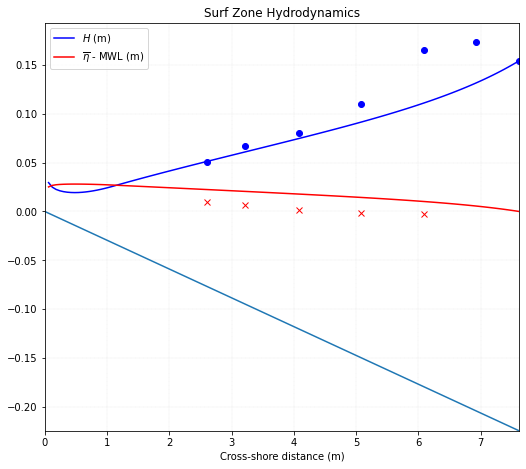

In [1]:
#Librerias utilizadas
import numpy as np
import matplotlib.pyplot as plt

# Test Hansen and Svendsen (1984)

H_wl = 0.1540 # Altura de ondas off-shore
T   = 2 # Periodo del oleaje incidente

# Batimetría
dx = 0.06
X  = np.arange(0,(1*7.62)+dx,dx)#7.62
Zf = np.array(-1/34*X) # Playa de pendiente uniforme 1/34
h  = np.flipud(Zf)
x  = np.flipud(X)

# Mediciones experimentales

# H - alturas de olas medidas
Hm   = np.array([0.0510, 0.0670, 0.0800, 0.1100, 0.1650, 0.1730, 0.1540])
Xm_H = np.array([2.6000, 3.2200, 4.0800, 5.0800, 6.0900, 6.9200, 7.6200])
# Set-up medido
MWL_    = np.array([0.0100, 0.0070, 0.0020, -0.0020, -0.0030])
Xm_MWL = np.array([2.6000, 3.2200, 4.0800,  5.0800,  6.0900])

def Q_BJ(H_H):
  # Rattanapitikon & Sawanggun (2007)
  a   = [0.231707207858562, -3.609582722187040, 22.594833612442000, -72.536799430847200, 126.870449066162000, -120.567666053772000, 60.741998672485400, -12.725062847137500]
  Q_b = 0
  for i in range(len(a)):
    Q  = a[i]*(H_H**i)
    Q_b = Q_b + Q
  return Q_b


g     = 9.81
#gamma = 0.78

H_0   = H_wl #2 # Altura de la ola (m)
MWL_0 = 0 # MEAN WATER LEVEL (MWL)
#T     = 10 # Periodo de las olas (s)

w     = 2*np.pi/T



limite = np.squeeze(np.where(h >= -0.0001)[0])
#h      = np.abs(h)

H_rms = np.zeros(limite)
MWL   = np.zeros(limite)

#Condiciones de borde
H_rms[0] = H_0
MWL[0]   = MWL_0

for i in range(limite-1):
  dx     = np.abs(x[i+1]-x[i])
  k      = w/np.sqrt(g*np.abs(h[i]))
  H_b    = (0.88/k)*np.tanh(0.91*k*np.abs(h[i]))
  if (H_rms[i]/H_b > 0.3) and (H_rms[i]/H_b < 1.0):
    Q_b = Q_BJ(H_rms[i]/H_b)
  elif (H_rms[i]/H_b <= 0.3):
    Q_b = 0
  elif (H_rms[i]/H_b >= 1.0):
    Q_b = 1
  
  H_rms[i+1] = np.sqrt( (  ((H_rms[i]**2)*np.sqrt(g*np.abs(h[i]))) - ( (2/T)*Q_b*(H_b**2)*dx )  ) / np.sqrt(g*np.abs(h[i+1])) )

  MWL[i+1] = MWL[i] - ( ((3/16)/(np.abs(h[i])+MWL[i]))*(H_rms[i+1]**2 - H_rms[i]**2) )
  #if (MWL[i+1] <= h[i]):
  #  break


#Plots
alto  = 7.5
ancho = 8.5
fig = plt.figure(figsize=(ancho, alto))

# from observed data
plt.plot(Xm_H,Hm,'ob')
plt.plot(Xm_MWL,MWL_,'x',c='r')
#plt.plot(Xm_MWL,MWL,'xr')

plt.plot(X,Zf)
plt.plot(x[:limite],H_rms[:limite],'b',label='$H$ (m)')
plt.plot(x[:limite],MWL[:limite],'r',label='$\\overline{\\eta}$ - MWL (m)')

title    = 'Surf Zone Hydrodynamics'
plt.title(title)
plt.xlabel('Cross-shore distance (m)')
plt.ylim(np.min(Zf),1.25*np.max([H_rms]))
plt.xlim(X[0],X[-1])
plt.legend()
plt.grid(color='lightgray', linestyle='--', linewidth=0.25)
plt.show()

